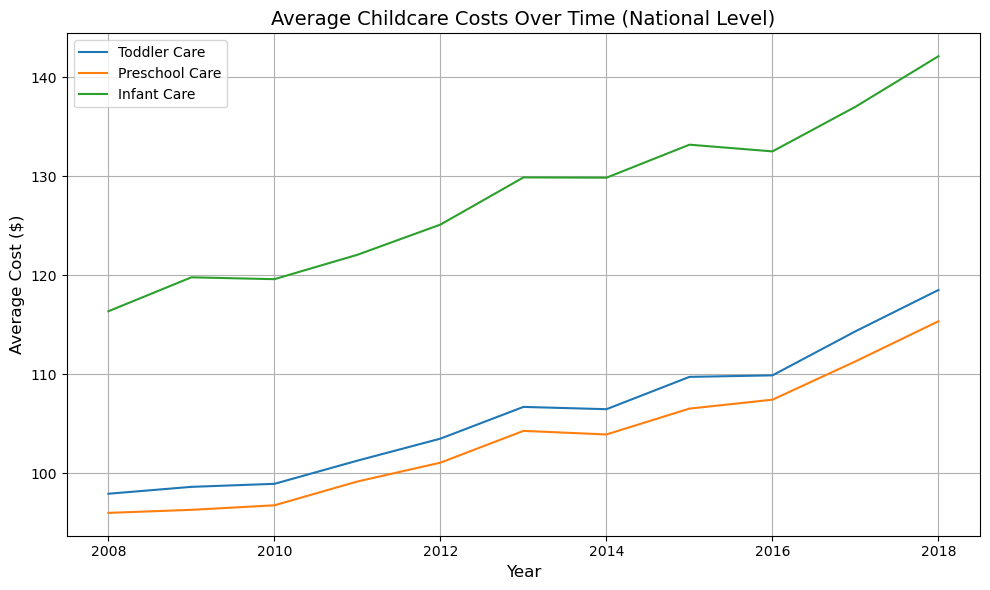

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('nationaldatabaseofchildcareprices.xlsx')

cost_columns = ['StudyYear', 'MFCCToddler', 'MFCCPreschool', '_75FCCInfant']
df_costs = df[cost_columns]
df_costs_avg = df_costs.groupby('StudyYear').mean()

plt.figure(figsize=(10, 6))
plt.plot(df_costs_avg.index, df_costs_avg['MFCCToddler'], label='Toddler Care')
plt.plot(df_costs_avg.index, df_costs_avg['MFCCPreschool'], label='Preschool Care')
plt.plot(df_costs_avg.index, df_costs_avg['_75FCCInfant'], label='Infant Care')
plt.title('Average Childcare Costs Over Time (National Level)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Cost ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
# Get the average costs in 2017 and 2022
cost_earlier = df_costs_avg.loc[2008, 'MFCCToddler']
cost_recent = df_costs_avg.loc[2018, 'MFCCToddler']

# Calculate percentage increase
percentage_increase = ((cost_recent - cost_earlier) / cost_earlier) * 100

print(percentage_increase)

21.00561042440438


In [3]:
# Get the average costs in 2017 and 2022
cost_earlier = df_costs_avg.loc[2008, 'MFCCPreschool']
cost_recent = df_costs_avg.loc[2018, 'MFCCPreschool']

# Calculate percentage increase
percentage_increase = ((cost_recent - cost_earlier) / cost_earlier) * 100

print(percentage_increase)

20.15403291051832


In [4]:
cost_earlier = df_costs_avg.loc[2008, '_75FCCInfant']
cost_recent = df_costs_avg.loc[2018, '_75FCCInfant']
percentage_increase = ((cost_recent - cost_earlier) / cost_earlier) * 100

print(percentage_increase)

22.13072835258442


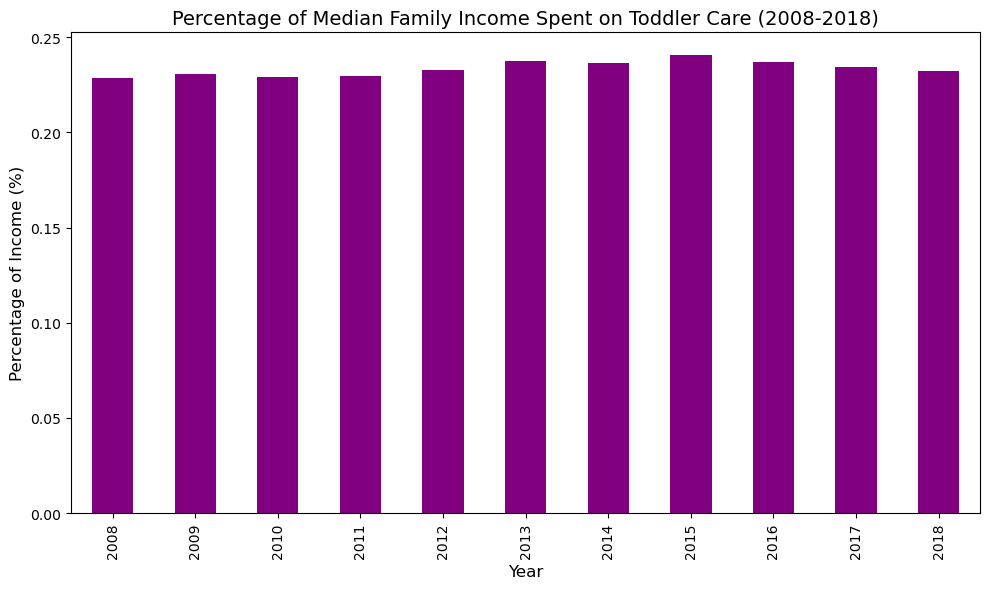

In [5]:
columns_needed = ['State_Name', 'StudyYear', 'MFCCToddler', 'MHI']
df_subset = df[columns_needed]

df_subset = df_subset.dropna(subset=['MFCCToddler', 'MHI'])
df_subset['ToddlerCostPctIncome'] = (df_subset['MFCCToddler'] / df_subset['MHI']) * 100
df_grouped = df_subset.groupby('StudyYear')['ToddlerCostPctIncome'].mean()

plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar', color='purple')
plt.title('Percentage of Median Family Income Spent on Toddler Care (2008-2018)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Income (%)', fontsize=12)
plt.tight_layout()
plt.show()

In [6]:
print(df_grouped)

StudyYear
2008    0.228461
2009    0.230848
2010    0.229202
2011    0.229529
2012    0.232757
2013    0.237431
2014    0.236143
2015    0.240465
2016    0.237097
2017    0.234261
2018    0.232417
Name: ToddlerCostPctIncome, dtype: float64


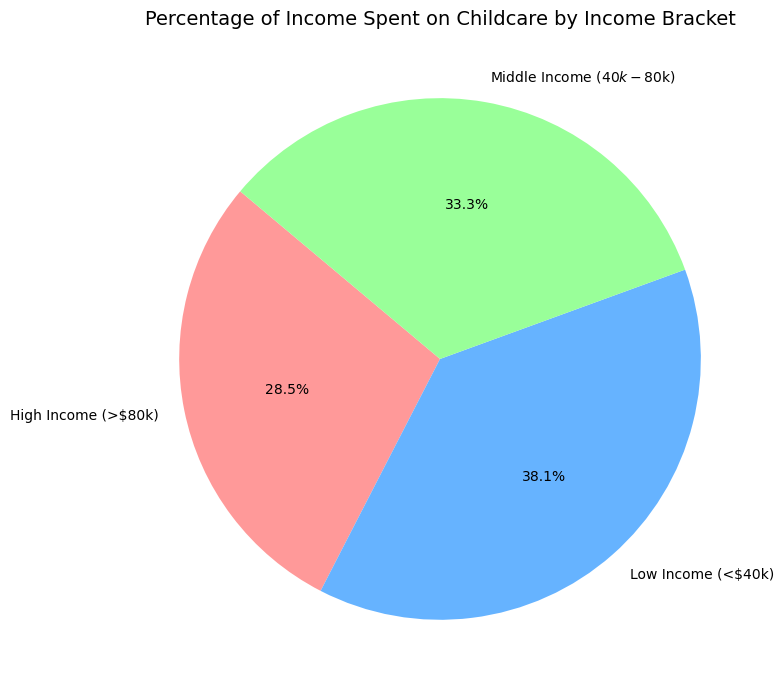

In [7]:
def income_bracket(income):
    if income < 40000:
        return 'Low Income (<$40k)'
    elif 40000 <= income <= 80000:
        return 'Middle Income ($40k-$80k)'
    else:
        return 'High Income (>$80k)'

columns_needed = ['State_Name', 'StudyYear', 'MFCCToddler', 'MHI']
df_subset = df[columns_needed]
df_subset = df_subset.dropna(subset=['MFCCToddler', 'MHI'])

df_subset['IncomeBracket'] = df_subset['MHI'].apply(income_bracket)
df_subset['ToddlerCostPctIncome'] = (df_subset['MFCCToddler'] / df_subset['MHI']) * 100

df_grouped = df_subset.groupby('IncomeBracket')['ToddlerCostPctIncome'].mean()
plt.figure(figsize=(8, 8))
plt.pie(df_grouped, labels=df_grouped.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Percentage of Income Spent on Childcare by Income Bracket', fontsize=14)
plt.tight_layout()
plt.show()

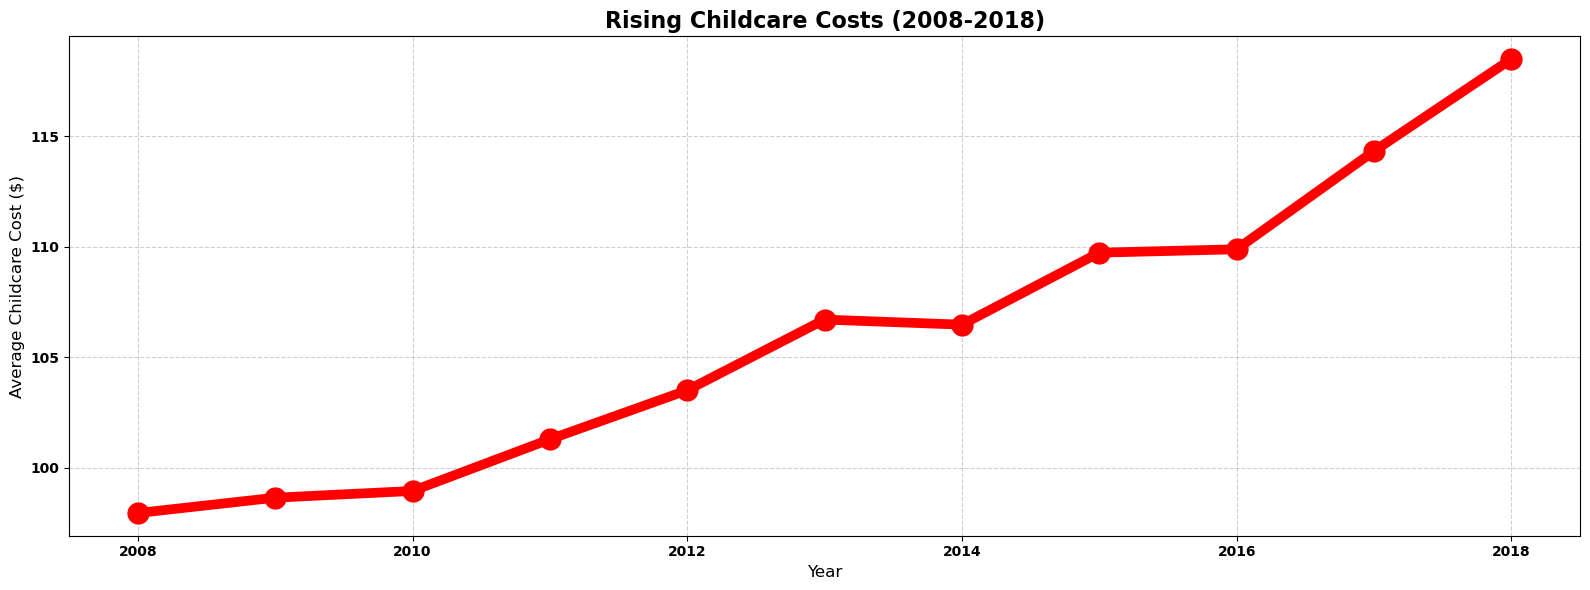

In [8]:
# Billboard Graph

columns_needed = ['StudyYear', 'MFCCToddler']
df_subset = df[columns_needed]
df_grouped = df_subset.groupby('StudyYear')['MFCCToddler'].mean()

plt.figure(figsize=(16, 6))
plt.plot(df_grouped.index, df_grouped, color='red', marker='o', linestyle='-', linewidth=7, markersize=15)
plt.title('Rising Childcare Costs (2008-2018)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Childcare Cost ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.tight_layout()
plt.show()

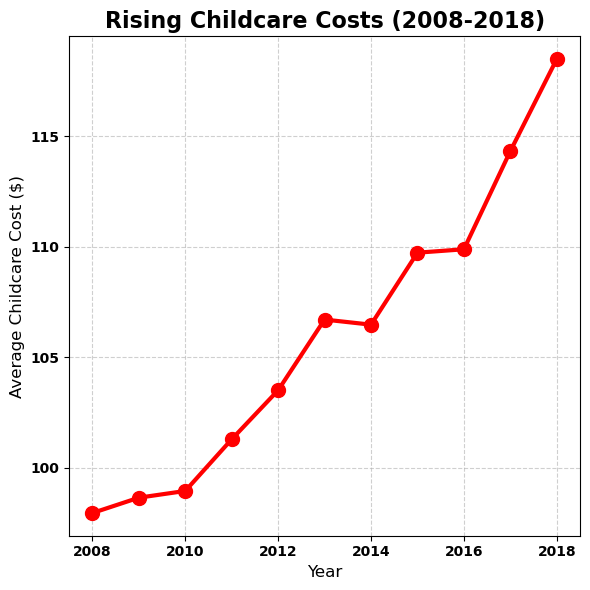

In [9]:
# TikTok Graph

columns_needed = ['StudyYear', 'MFCCToddler']
df_subset = df[columns_needed]
df_grouped = df_subset.groupby('StudyYear')['MFCCToddler'].mean()

plt.figure(figsize=(6, 6))
plt.plot(df_grouped.index, df_grouped, color='red', marker='o', linestyle='-', linewidth=3, markersize=10)
plt.title('Rising Childcare Costs (2008-2018)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Childcare Cost ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.tight_layout()
plt.show()